In [38]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# runs = ELPH_utils.load_runs()

# runs_w002 = ELPH_utils.load_runs(filename='../runs_w0.02.npz')
# runs_w003 = ELPH_utils.load_runs(filename='../runs_w0.03.npz')
# runs_w01 = ELPH_utils.load_runs(filename='../runs_w0.1.npz')

# runs = runs[:] + runs_w002[:] + runs_w003 + runs_w01


runs = ELPH_utils.load_runs(filename='../runs_rand_inits_n_kmax=80.npz')


n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

100 loaded with n_kmax = 80


runs[0] shape:  (80, 400)


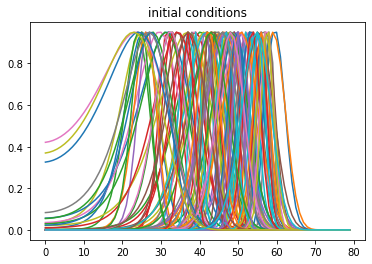

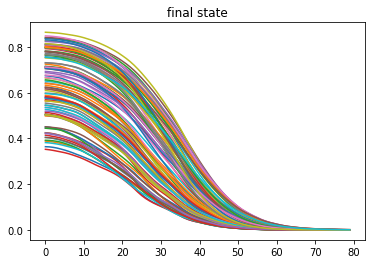

In [40]:
print('runs[0] shape: ', runs[0].shape)

for k in range(n_runs):
    plt.plot(runs[k][:,0])

plt.title('initial conditions')
plt.show()


for k in range(n_runs):
    plt.plot(runs[k][:,-1])

plt.title('final state')
plt.show()

(100, 80, 400)


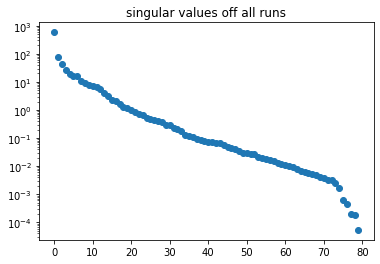

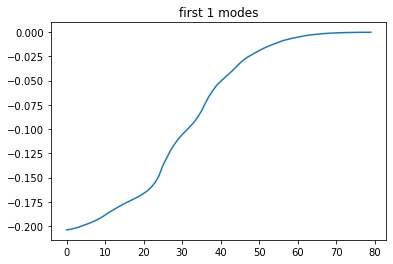

In [41]:
from ELPH_SVDAPPRX import SVDAPPRX


print(np.shape(runs))

model = SVDAPPRX(runs)
model.train()

plt.semilogy(model.S, 'o')
plt.title('singular values off all runs')
plt.show()

rdim = 1

for l in range(rdim):
  plt.plot(model.U[:,l],  label='Uhat_'+str(l))
plt.title('first ' + str(rdim) + ' modes')
plt.show()


0.014320013368313456


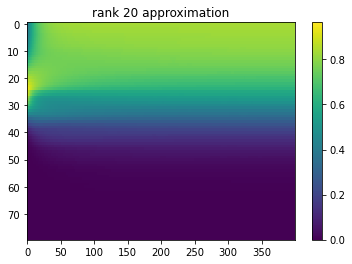

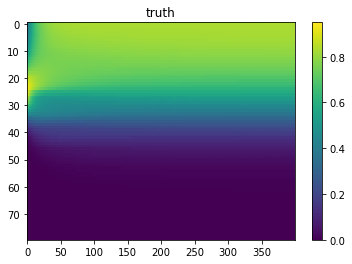

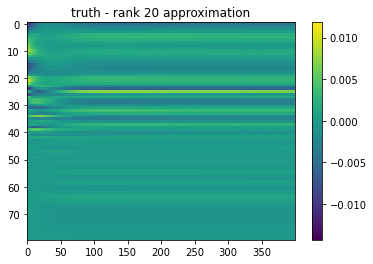

In [8]:
from ELPH_SVDAPPRX import SVDAPPRX


train_runs = runs[::1]
test_run = train_runs.pop(90).copy()

model = SVDAPPRX(train_runs)

wcols = 1.0 + 10.*np.exp(-10.*np.linspace(0,1,runs[0].shape[1]))

model.train(wcols=wcols)


rdim = 20
recon = model.approx_single_run(test_run, rdim=rdim)
print(model.get_error(test_run, recon, norm='max'))

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('rank ' + str(rdim) + ' approximation')
plt.show()

plt.imshow(test_run, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('truth')
plt.show()

plt.imshow(test_run - recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('truth - rank ' + str(rdim) + ' approximation')
plt.show()

# 0.013346708461385304


In [13]:
wcols = 1.0 + 10.*np.exp(-10.*np.linspace(0,1,runs[0].shape[1]))

m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':20, 'wcols':wcols}, score_kwargs={'norm':'max'})
print(m)
print(s)

0.019594527594669134
[0.020928817459480897, 0.01894605530060478, 0.01820611485253179, 0.015240622481886634, 0.024651027878841564]


In [7]:
SVD_approx_err = np.zeros(n_kmax)
for rdim in range(n_kmax):
    SVD_approx_err[rdim] = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':rdim+1}, score_kwargs={'norm':'max'})[0]
    


KeyboardInterrupt: 

In [ ]:
plt.grid()
plt.plot(np.arange(1,n_kmax+1),SVD_approx_err)
plt.xlabel('reconstruction rank')
plt.ylabel('reconstruction error')
plt.show()

plt.grid()
plt.semilogy(np.arange(1,n_kmax+1),SVD_approx_err)
plt.xlabel('reconstruction rank')
plt.ylabel('reconstruction error')
plt.ylim(1e-3,)
plt.show()

In [8]:
err = []
A = np.linspace(0,50,20)
for a in A:
    wcols = 1.0 + a*np.exp(-1.*a*np.linspace(0,1,runs[0].shape[1]))

    m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':20, 'wcols':wcols}, score_kwargs={'norm':'max'})
    print(m)
    err.append(m)
    
    

0.023677821300730227
0.021389056422919852
0.020368464408427173
0.019797807814826547
0.019583473691956538
0.019690050043415442
0.02000438705936517
0.020437434785831772
0.020959770770993986
0.021510908017200035
0.02207035967645724
0.022662349004672948
0.023359424992462113
0.024127496743054127
0.0248937119939698
0.025653680139441044
0.02636201814388764
0.026997514156636742
0.0275637179822228
0.028060589459969164


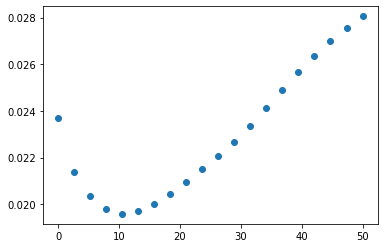

In [9]:
plt.plot(A,err,'o')
plt.show()